### **Mount drive**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd {'/content/drive/MyDrive/Kaggle'}

/content/drive/MyDrive/Kaggle


### **Libraries**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model, svm, datasets, neighbors, tree, naive_bayes
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, LeaveOneOut
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# **Load data created in previous notebook**

In [4]:
import os
import pickle
with open('Datasets/data_encoded.pickle', 'rb') as file:
    dict_prepared = pickle.load(file)

In [5]:
X_train = dict_prepared['X_train']
X_test = dict_prepared['X_test']
y_train = dict_prepared['y_train']
y_test = dict_prepared['y_test']

# **Feature Scaling**

In [6]:
col_names = X_train.columns

## **MinMaxScaler**

In [7]:
scaler1 = MinMaxScaler()
X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()
#fit train and test
X_train_minmax = scaler1.fit_transform(X_train_minmax)
X_test_minmax = scaler1.fit_transform(X_test_minmax)
#restore
X_train_minmax = pd.DataFrame(X_train_minmax, columns=col_names)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=col_names)

## **StandardScaler**

In [8]:
scaler2 = StandardScaler()
X_train_std = X_train.copy()
X_test_std = X_test.copy()
#fit train and test
X_train_std = scaler1.fit_transform(X_train_std)
X_test_std = scaler1.fit_transform(X_test_std)
#restore
X_train_std = pd.DataFrame(X_train_std, columns=col_names)
X_test_std = pd.DataFrame(X_test_std, columns=col_names)

# **Training models**

In [9]:
# ignore basic warnings
import warnings

warnings.filterwarnings('ignore')

In [10]:
original = [X_train, X_test, y_train, y_test]
min_max = [X_train_minmax, X_test_minmax, y_train, y_test]
std = [X_train_std, X_test_std, y_train, y_test]

In [49]:
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': linear_model.SGDClassifier(),
    'KNeighborsClassifier': neighbors.KNeighborsClassifier(),
    'DecisionTreeClassifier': tree.DecisionTreeClassifier(),
    'GaussianNB': naive_bayes.GaussianNB(),
    'SGDClassifier': SGDClassifier(),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoostClassifier' : XGBClassifier()
}

    #'SVC': svm.SVC(kernel='linear'),
    #'LinearSVC': svm.LinearSVC(),
    #'SVCrbf': svm.SVC(kernel='rbf'),
    #'SVCpoly': svm.SVC(kernel='poly'),

In [52]:
def model_evaluate(model, Xtrain, Xtest, ytrain, ytest):
  model.fit(Xtrain, ytrain)
  y_pred = model.predict(Xtest)
  score = model.score(Xtest, ytest)
  return score

In [59]:
scores_ls = []
confusion_matrix_ls = []

data = [original, min_max, std]
for d in data:
    scores = {name: [] for name in classifiers}
    cms = {name: [] for name in classifiers}
    Xtrain, Xtest, ytrain, ytest = d
    for name, model in classifiers.items():
        model.fit(Xtrain, ytrain)
        y_pred = model.predict(Xtest)
        score = model.score(Xtest, ytest)
        scores[name].append(score)

        cm = confusion_matrix(y_test, y_pred)
        cms[name] = cm.ravel()
    
    scores = {name: sum(score)/len(score) for name, score in scores.items()}
    scores_ls.append(scores)
    confusion_matrix_ls.append(cms)

pd.DataFrame(scores_ls, index=['original', 'minmax', 'standard']).transpose()

,original,minmax,standard
LogisticRegression,0.840677,0.845916,0.845916
SGDClassifier,0.822849,0.844650,0.845248
KNeighborsClassifier,0.832308,0.801329,0.801329
DecisionTreeClassifier,0.784767,0.775801,0.775906
GaussianNB,0.641338,0.637329,0.637329
LinearDiscriminantAnalysis,0.846338,0.845599,0.845599
RandomForestClassifier,0.855480,0.854249,0.854601
XGBoostClassifier,0.847744,0.847147,0.847147


## **Confusion matrix**

In [60]:
confusion_matrix_ls

[{'DecisionTreeClassifier': array([18921,  3143,  2978,  3397]),
  'GaussianNB': array([13622,  8442,  1758,  4617]),
  'KNeighborsClassifier': array([20489,  1575,  3194,  3181]),
  'LinearDiscriminantAnalysis': array([20772,  1292,  3078,  3297]),
  'LogisticRegression': array([20866,  1198,  3333,  3042]),
  'RandomForestClassifier': array([21163,   901,  3209,  3166]),
  'SGDClassifier': array([21766,   298,  4740,  1635]),
  'XGBoostClassifier': array([21041,  1023,  3307,  3068])},
 {'DecisionTreeClassifier': array([18640,  3424,  2952,  3423]),
  'GaussianNB': array([13469,  8595,  1719,  4656]),
  'KNeighborsClassifier': array([20447,  1617,  4033,  2342]),
  'LinearDiscriminantAnalysis': array([20894,  1170,  3221,  3154]),
  'LogisticRegression': array([20907,  1157,  3225,  3150]),
  'RandomForestClassifier': array([21094,   970,  3175,  3200]),
  'SGDClassifier': array([21090,   974,  3444,  2931]),
  'XGBoostClassifier': array([20993,  1071,  3276,  3099])},
 {'DecisionTre

In [124]:
#data_results represents original(0), minmax(1), standard(2)
def show_results(data_results):
  for model in data_results:
      v = data_results[model]
      TN = v[0]
      FP = v[1]
      FN = v[2]
      TP = v[3]
      print('\n',model)
      print('Classification accuracy: ', (TP+TN)/float(TP+TN+FP+FN))
      print('Classification error: ', (FP+FN)/float(TP+TN+FP+FN))
      print('Precision: ', TP/float(TP+FP))
      print('Recall: ', TP/float(TP+FN))

def show_matrix(data_results):
  for model in data_results:
      v = data_results[model]
      TN = v[0]
      FP = v[1]
      FN = v[2]
      TP = v[3]
      cm=[[TN,FP],[FN, TP ]]
      plt.figure(figsize=(6,6))
      plt.title(model)
      sns.heatmap(cm,annot=True, square=True, fmt='d', cbar=False, cmap='Blues')

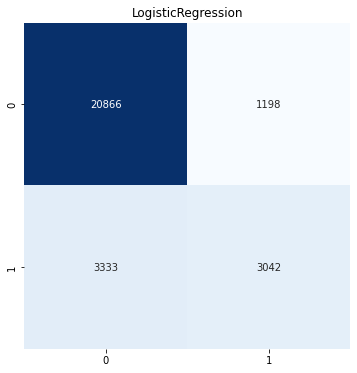

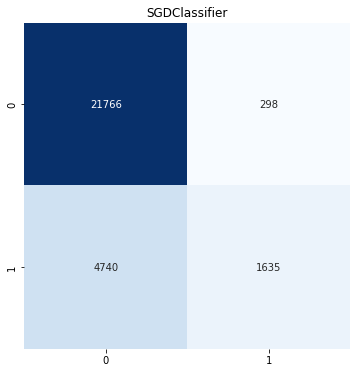

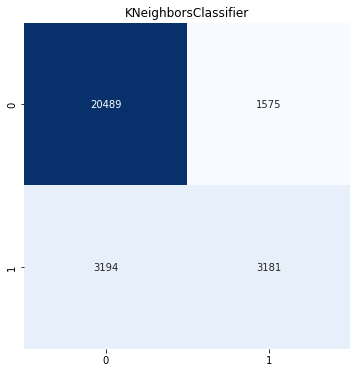

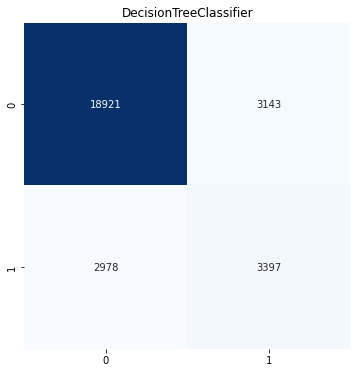

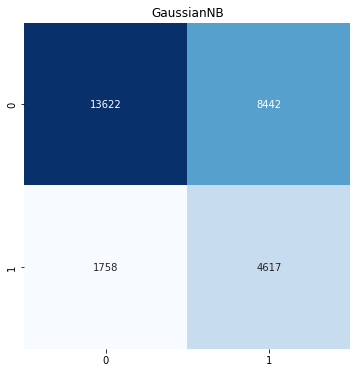

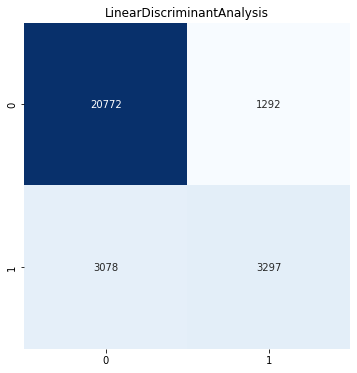

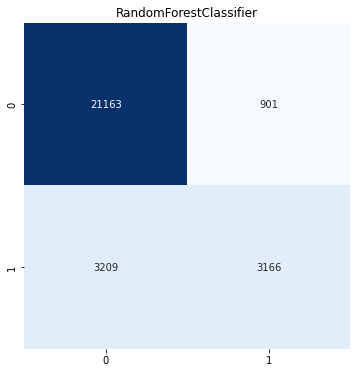

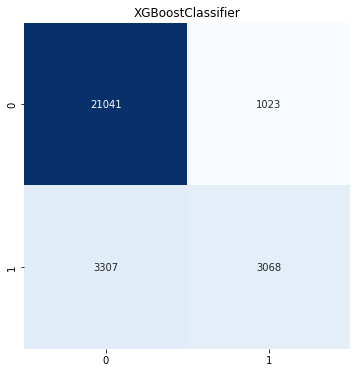

In [125]:
#original
show_matrix(confusion_matrix_ls[0])

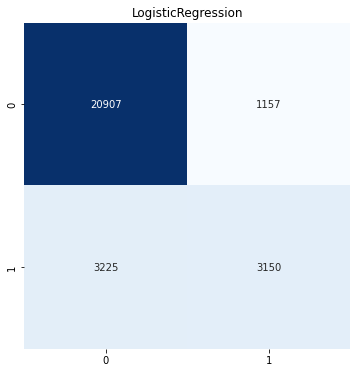

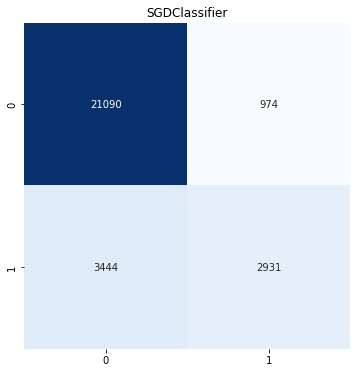

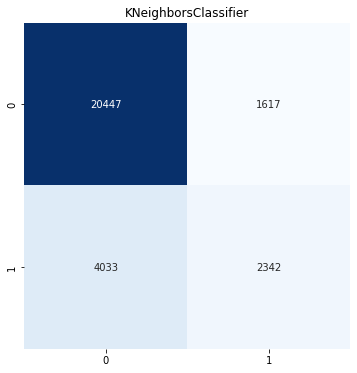

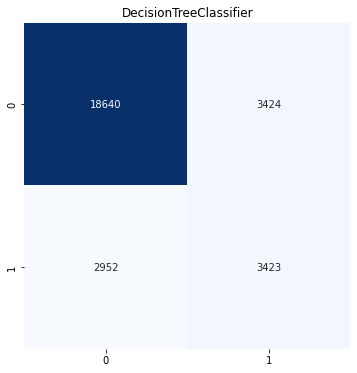

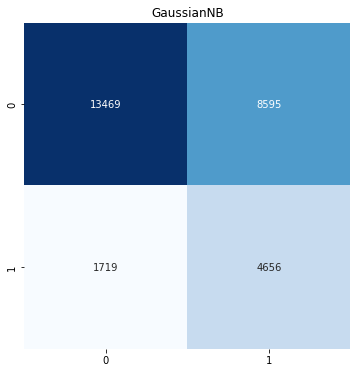

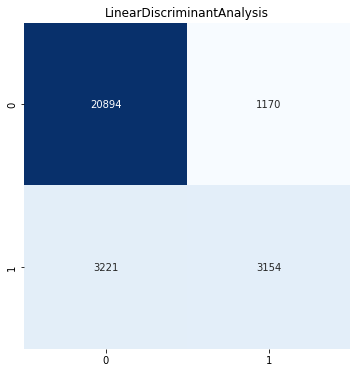

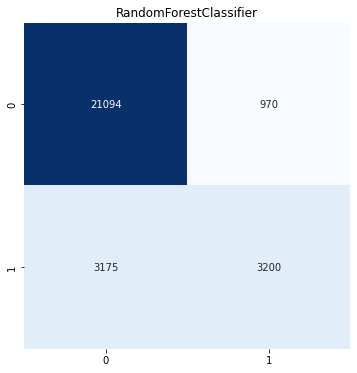

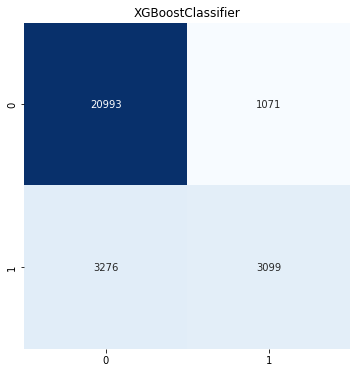

In [129]:
#minmax
show_matrix(confusion_matrix_ls[1])

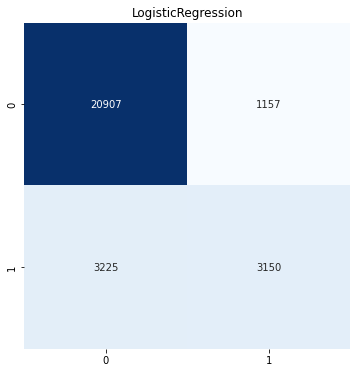

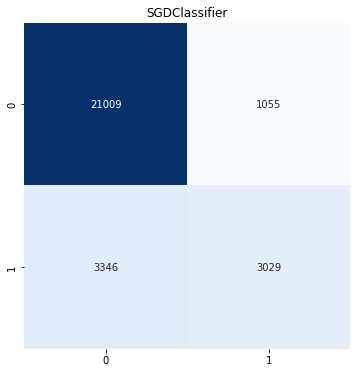

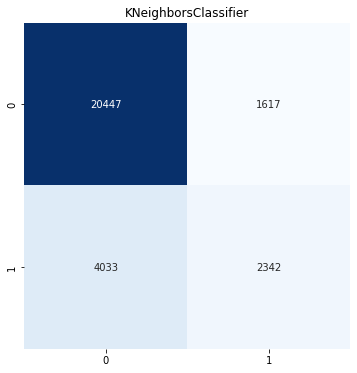

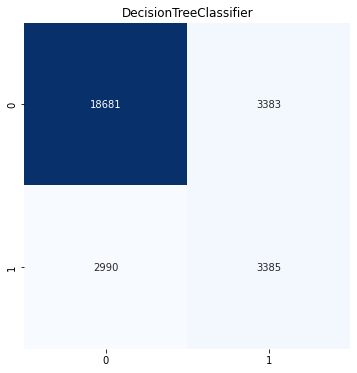

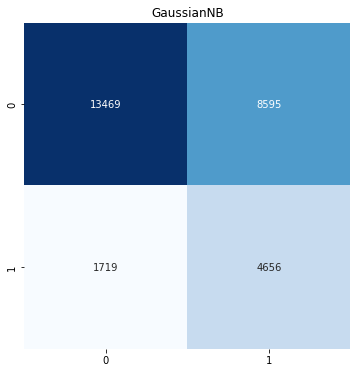

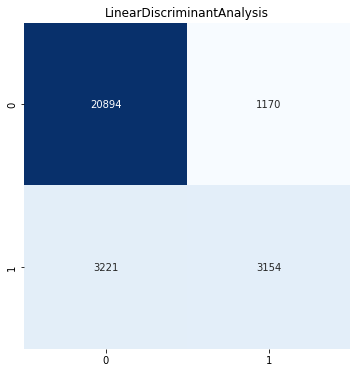

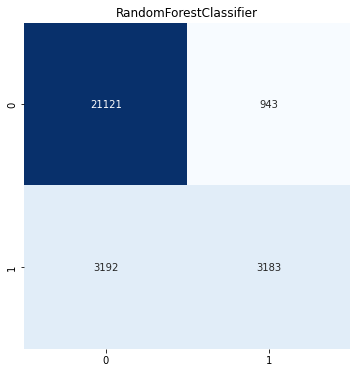

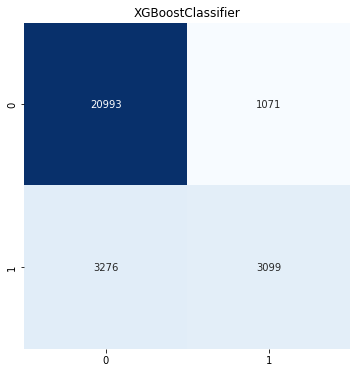

In [130]:
#standard
show_matrix(confusion_matrix_ls[2])

In [131]:
#original
show_results(confusion_matrix_ls[0])


 LogisticRegression
Classification accuracy:  0.8406765357431696
Classification error:  0.15932346425683042
Precision:  0.7174528301886792
Recall:  0.4771764705882353

 SGDClassifier
Classification accuracy:  0.8228489046731601
Classification error:  0.1771510953268399
Precision:  0.8458354888773927
Recall:  0.2564705882352941

 KNeighborsClassifier
Classification accuracy:  0.8323077464045853
Classification error:  0.16769225359541476
Precision:  0.6688393608074011
Recall:  0.49898039215686274

 DecisionTreeClassifier
Classification accuracy:  0.78476739688456
Classification error:  0.21523260311544007
Precision:  0.5194189602446483
Recall:  0.5328627450980392

 GaussianNB
Classification accuracy:  0.641337599774957
Classification error:  0.3586624002250431
Precision:  0.35354927636113026
Recall:  0.7242352941176471

 LinearDiscriminantAnalysis
Classification accuracy:  0.846337775589859
Classification error:  0.153662224410141
Precision:  0.7184571802135542
Recall:  0.51717647058823

In [132]:
#minmax
show_results(confusion_matrix_ls[1])


 LogisticRegression
Classification accuracy:  0.8459158198248884
Classification error:  0.15408418017511163
Precision:  0.7313675412119804
Recall:  0.49411764705882355

 SGDClassifier
Classification accuracy:  0.8446499525299764
Classification error:  0.15535004747002357
Precision:  0.7505761843790013
Recall:  0.45976470588235296

 KNeighborsClassifier
Classification accuracy:  0.8013291606596575
Classification error:  0.1986708393403425
Precision:  0.5915635261429654
Recall:  0.36737254901960786

 DecisionTreeClassifier
Classification accuracy:  0.7758008368789339
Classification error:  0.22419916312106614
Precision:  0.49992697531765734
Recall:  0.5369411764705883

 GaussianNB
Classification accuracy:  0.6373290200077358
Classification error:  0.36267097999226416
Precision:  0.3513697079465701
Recall:  0.7303529411764705

 LinearDiscriminantAnalysis
Classification accuracy:  0.8455993530011604
Classification error:  0.15440064699883962
Precision:  0.7294172062904718
Recall:  0.49474

In [133]:
#standard
show_results(confusion_matrix_ls[2])


 LogisticRegression
Classification accuracy:  0.8459158198248884
Classification error:  0.15408418017511163
Precision:  0.7313675412119804
Recall:  0.49411764705882355

 SGDClassifier
Classification accuracy:  0.8452477231970181
Classification error:  0.15475227680298181
Precision:  0.7416748285994124
Recall:  0.4751372549019608

 KNeighborsClassifier
Classification accuracy:  0.8013291606596575
Classification error:  0.1986708393403425
Precision:  0.5915635261429654
Recall:  0.36737254901960786

 DecisionTreeClassifier
Classification accuracy:  0.7759063258201765
Classification error:  0.22409367417982348
Precision:  0.5001477541371159
Recall:  0.5309803921568628

 GaussianNB
Classification accuracy:  0.6373290200077358
Classification error:  0.36267097999226416
Precision:  0.3513697079465701
Recall:  0.7303529411764705

 LinearDiscriminantAnalysis
Classification accuracy:  0.8455993530011604
Classification error:  0.15440064699883962
Precision:  0.7294172062904718
Recall:  0.4947450

# **Ensemble methods**

## **Random Forest Classifier**

In [134]:
n = ['original', 'minmax', 'standard']
i=0
for d in data:
  Xtrain, Xtest, ytrain, ytest = d
  rf = RandomForestClassifier(n_estimators=10)
  rf.fit(Xtrain, ytrain)
  y_pred = rf.predict(X_test)
  score = rf.score(Xtest, ytest)
  print(n[i])
  print(f'{rf.__class__.__name__}: {score}')
  i=i+1

original
RandomForestClassifier: 0.8410984915081402
minmax
RandomForestClassifier: 0.8395161573895004
standard
RandomForestClassifier: 0.8410984915081402


## **Bagging classifier**

In [138]:
n = ['original', 'minmax', 'standard']
i=0
for d in data:
  Xtrain, Xtest, ytrain, ytest = d
  bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
  bagging.fit(Xtrain,ytrain)
  y_pred = bagging.predict(Xtest)
  score = bagging.score(Xtest, ytest)
  print(n[i])
  print(f'{bagging.__class__.__name__}: {score}')
  i=i+1

original
BaggingClassifier: 0.8338197545623967
minmax
BaggingClassifier: 0.8205281479658216
standard
BaggingClassifier: 0.8234115123597876


## **Gradient Boosting classifier**

In [137]:
n = ['original', 'minmax', 'standard']
i=0
for d in data:
  Xtrain, Xtest, ytrain, ytest = d
  boosting = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=1.0,
    max_depth=1,
    random_state=0
  )
  boosting.fit(Xtrain, ytrain)
  score = boosting.score(Xtest, ytest)
  print(n[i])
  print(f'{boosting.__class__.__name__}: {score}')
  i=i+1

original
GradientBoostingClassifier: 0.845071908294947
minmax
GradientBoostingClassifier: 0.8442279967650058
standard
GradientBoostingClassifier: 0.8442279967650058
